In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/Users/amirgazar/Documents/GitHub/Decarbonization-Tradeoffs/1 Decarbonization Pathways/Decarbonization_Pathways.xlsx"

# Read all sheets into a dictionary
all_sheets = pd.read_excel(file_path, sheet_name=None)

# List to hold DataFrames
df_list = []

# Iterate over each sheet
for sheet_name, df in all_sheets.items():
    df['Pathway'] = sheet_name  # Add the 'Pathway' column
    df_list.append(df)

# Concatenate all DataFrames into one
decarb_pathways = pd.concat(df_list, ignore_index=True)

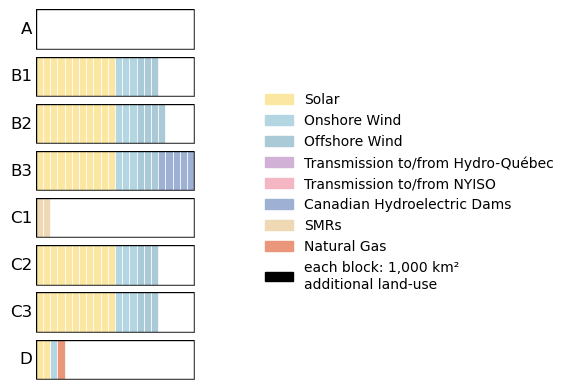

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch

# ── A) MANUAL CANADIAN HYDRO INJECTION (ONLY FOR B3) ───────────────────
b3_hydro_map = {
    2025: 0,
    2050: 3692.308
}
decarb_pathways['Canadian Hydro'] = 0.0
mask_b3 = decarb_pathways['Pathway'] == 'B3'
decarb_pathways.loc[mask_b3, 'Canadian Hydro'] = (
    decarb_pathways.loc[mask_b3, 'Year']
                 .map(b3_hydro_map)
                 .fillna(0)
)

# ── B) DEFINE LAND‐USE FACTORS & ORDER ──────────────────────────────────
land_use_factors = {
    'Solar':         17.6,
    'Onshore Wind':  28.58,
    'Offshore Wind': 10,
    'Imports QC':     4.19,
    'Imports NYISO':  4.19,
    'Canadian Hydro':127.56,
    'SMR':            4.791,
    'New NG':         5.02
}
techs = [
    'Solar',
    'Onshore Wind',
    'Offshore Wind',
    'Imports QC',
    'Imports NYISO',
    'Canadian Hydro',
    'SMR',
    'New NG'
]
colors = {
    "Solar":         "#FBE7A1",
    "Onshore Wind":  "#B4D6E3",
    "Offshore Wind": "#A9CAD6",
    "Imports QC":    "#D1B1D6",
    "Imports NYISO": "#F4B6C2",
    "Canadian Hydro":"#9EB1D4",
    "SMR":           "#EFD9B4",
    "New NG":        "#E9967A"
}

# ── C) COMPUTE Δha FOR 2024→2050 ────────────────────────────────────────
baseline, target = decarb_pathways['Year'].min(), 2050
df0 = decarb_pathways.query("Year==@baseline").set_index('Pathway')
df1 = decarb_pathways.query("Year==@target").set_index('Pathway')
cap_diff  = df1[techs] - df0[techs]
land_diff = cap_diff.multiply(pd.Series(land_use_factors), axis=1)

# ── D) CONVERT TO “WAFFLE” SQUARES ────────────────────────────────────
# 1 square = 1 000 km² = 100 000 ha
ha_per_square = 100_000
land_sqs = (land_diff / ha_per_square).round().astype(int)

pathways = land_sqs.index.tolist()
n_paths  = len(pathways)
max_sqs   = land_sqs.sum(axis=1).max()

# ── E) PLOT ───────────────────────────────────────────────────────────
fig, axs = plt.subplots(
    n_paths, 1,
    figsize=(max_sqs*0.12, n_paths*0.6),
    sharex=True
)
fig.subplots_adjust(left=0.2, right=0.8)
if n_paths == 1:
    axs = [axs]

for ax, pw in zip(axs, pathways):
    x = 0
    # draw each tech’s blocks
    for tech in techs:
        for _ in range(land_sqs.loc[pw, tech]):
            ax.add_patch(
                Rectangle((x, 0), 1, 1,
                          facecolor=colors[tech],
                          edgecolor='white',
                          linewidth=0.5,
                          zorder=1)
            )
            x += 1

    # uniform border on top
    ax.add_patch(
        Rectangle((0, 0), max_sqs, 1,
                  fill=False,
                  edgecolor='black',
                  linewidth=1,
                  joinstyle='miter',
                  zorder=2)
    )
        # draw a single border patch that won’t get clipped
    border = Rectangle((0, 0), max_sqs, 1,
                       fill=False,
                       edgecolor='black',
                       linewidth=0.5,
                       joinstyle='miter',
                       zorder=2)
    ax.add_patch(border)
    border.set_clip_on(False)


    ax.set_xlim(0, max_sqs)
    ax.set_ylim(0, 1)
    ax.axis('off')
    ax.text(-0.5, 0.5, pw,
            ha='right', va='center',
            fontsize=12)

# ── F) LEGEND (with custom labels) ────────────────────────────────────
legend_mapping = {
    "Old fossil":               "Fossil fuels",
    "Nuclear":                  "Large nuclear",
    "Hydropower":               "Hydropower",
    "Biomass":                  "Biomass",
    "Imports QC":               "Transmission to/from Hydro-Québec",
    "Imports NYISO":            "Transmission to/from NYISO",
    "Imports NBSO":             "Transmission to/from NBSO",
    "Onshore Wind":             "Onshore Wind",
    "Offshore Wind":            "Offshore Wind",
    "Solar":                    "Solar",
    "New NG":                   "Natural Gas",
    "SMR":                      "SMRs",
    "Canadian Hydro":           "Canadian Hydroelectric Dams"
}

# tech‐color entries with remapped labels
handles = [
    Patch(color=colors[t], label=legend_mapping.get(t, t))
    for t in techs
]

# block‐size entry
block_label = 'each block: 1,000 km²\nadditional land-use'
handles.append(
    Patch(facecolor='black', edgecolor='black', label=block_label)
)

fig.legend(
    handles=handles,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)


# ── G) SAVE & SHOW ───────────────────────────────────────────────────
fig.savefig('land_use.png',
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.1)
plt.show()


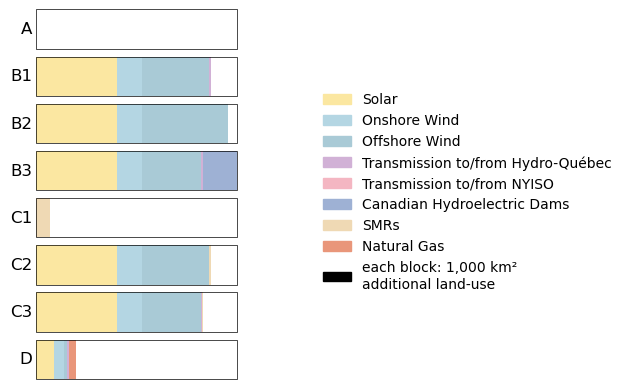

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/Users/amirgazar/Documents/GitHub/Decarbonization-Tradeoffs/1 Decarbonization Pathways/Decarbonization_Pathways.xlsx"

# Read all sheets into a dictionary
all_sheets = pd.read_excel(file_path, sheet_name=None)

# List to hold DataFrames
df_list = []

# Iterate over each sheet
for sheet_name, df in all_sheets.items():
    df['Pathway'] = sheet_name  # Add the 'Pathway' column
    df_list.append(df)

# Concatenate all DataFrames into one
decarb_pathways = pd.concat(df_list, ignore_index=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch

# ── 0) PREPARE YOUR DATAFRAME ───────────────────────────────────────────
# Ensure you have a DataFrame `decarb_pathways` with columns:
#   'Pathway', 'Year', and one column per technology in `techs`.
# e.g.: decarb_pathways = pd.read_csv('your_data.csv')

# ── A) MANUAL CANADIAN HYDRO INJECTION (ONLY FOR B3) ───────────────────
b3_hydro_map = {2025: 0, 2050: 3692.308}
decarb_pathways['Canadian Hydro'] = 0.0
mask_b3 = decarb_pathways['Pathway'] == 'B3'
decarb_pathways.loc[mask_b3, 'Canadian Hydro'] = (
    decarb_pathways.loc[mask_b3, 'Year']
                 .map(b3_hydro_map)
                 .fillna(0)
)

# ── B) DEFINE LAND‐USE FACTORS & ORDER ──────────────────────────────────
land_use_factors = {
    'Solar':         17.6,
    'Onshore Wind':  28.58,
    'Offshore Wind': 28.58,
    'Imports QC':     4.19,
    'Imports NYISO':  4.19,
    'Canadian Hydro':127.56,
    'SMR':            4.791,
    'New NG':         5.02
}
techs = [
    'Solar', 'Onshore Wind', 'Offshore Wind',
    'Imports QC', 'Imports NYISO', 'Canadian Hydro',
    'SMR', 'New NG'
]
colors = {
    "Solar":         "#FBE7A1",
    "Onshore Wind":  "#B4D6E3",
    "Offshore Wind": "#A9CAD6",
    "Imports QC":    "#D1B1D6",
    "Imports NYISO": "#F4B6C2",
    "Canadian Hydro":"#9EB1D4",
    "SMR":           "#EFD9B4",
    "New NG":        "#E9967A"
}

# ── C) COMPUTE Δha FOR BASELINE→2050 ───────────────────────────────────
baseline, target = decarb_pathways['Year'].min(), 2050
df0 = decarb_pathways.query("Year==@baseline").set_index('Pathway')
df1 = decarb_pathways.query("Year==@target").set_index('Pathway')
cap_diff  = df1[techs] - df0[techs]
land_diff = cap_diff.multiply(pd.Series(land_use_factors), axis=1)

# ── D) CONVERT TO “WAFFLE” SQUARES (INCLUDING FRACTIONS) ────────────────
ha_per_square   = 100_000                # 1 square = 100 000 ha
land_sqs_f      = land_diff / ha_per_square

# replace deprecated applymap with np.floor
full_sqs       = np.floor(land_sqs_f).astype(int)
fractional_sqs = land_sqs_f - full_sqs

pathways = full_sqs.index.tolist()
max_width = land_sqs_f.sum(axis=1).max()

# ── E) PLOT ───────────────────────────────────────────────────────────
fig, axs = plt.subplots(
    len(pathways), 1,
    figsize=(max_width * 0.12, len(pathways) * 0.6),
    sharex=True
)
fig.subplots_adjust(left=0.2, right=0.8)
if len(pathways) == 1:
    axs = [axs]

for ax, pw in zip(axs, pathways):
    x = 0
    for tech in techs:
        # 1) full 1×1 blocks
        for _ in range(full_sqs.loc[pw, tech]):
            ax.add_patch(Rectangle(
                (x, 0), 1, 1,
                facecolor=colors[tech],
                edgecolor='white',
                linewidth=0,
                zorder=1
            ))
            x += 1

        # 2) fractional block (e.g. 0.2 wide if you had 5.2 total)
        frac = fractional_sqs.loc[pw, tech]
        if frac > 0.1:
            ax.add_patch(Rectangle(
                (x, 0), frac, 1,
                facecolor=colors[tech],
                edgecolor='white',
                linewidth=0,
                zorder=1
            ))
            x += frac

    # draw a single border patch that won’t get clipped
    border = Rectangle((0, 0), max_width, 1,
                       fill=False,
                       edgecolor='black',
                       linewidth=0.5,
                       joinstyle='miter',
                       zorder=2)
    ax.add_patch(border)
    border.set_clip_on(False)
    
    ax.set_xlim(0, max_width)
    ax.axis('off')
    ax.text(
        -0.5, 0.5, pw,
        ha='right', va='center',
        fontsize=12
    )

# ── F) LEGEND ─────────────────────────────────────────────────────────
legend_mapping = {
    "Solar":        "Solar",
    "Onshore Wind": "Onshore Wind",
    "Offshore Wind":"Offshore Wind",
    "Imports QC":   "Transmission to/from Hydro-Québec",
    "Imports NYISO":"Transmission to/from NYISO",
    "Canadian Hydro":"Canadian Hydroelectric Dams",
    "SMR":          "SMRs",
    "New NG":       "Natural Gas"
}

handles = [
    Patch(color=colors[t], label=legend_mapping.get(t, t))
    for t in techs
]
handles.append(Patch(
    facecolor='black', edgecolor='black',
    label='each block: 1,000 km²\nadditional land-use'
))

fig.legend(
    handles=handles,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=False
)

# ── G) SAVE & SHOW ───────────────────────────────────────────────────
fig.savefig('land_use.png', dpi=300,
            bbox_inches='tight', pad_inches=0.1)
plt.show()


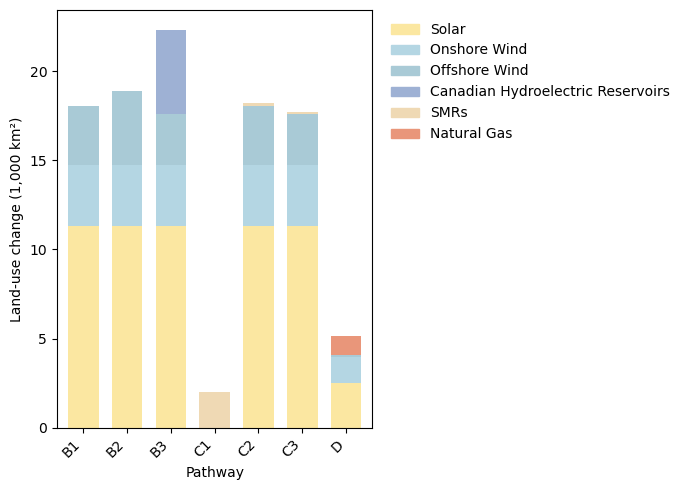

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ── 1) MANUAL CANADIAN HYDRO INJECTION FOR B3 ──────────────────────────
b3_hydro_map = {2025: 0, 2050: 3692.308}
decarb_pathways['Canadian Hydro'] = 0.0
mask_b3 = decarb_pathways['Pathway'] == 'B3'
decarb_pathways.loc[mask_b3, 'Canadian Hydro'] = (
    decarb_pathways.loc[mask_b3, 'Year']
                  .map(b3_hydro_map)
                  .fillna(0)
)

# ── 2) DEFINE LAND-USE FACTORS & TECH ORDER ─────────────────────────────
land_use_factors = {
    'Solar':         17.6,
    'Onshore Wind':  28.58,
    'Offshore Wind': 10,
    'Imports QC':     4.19,
    'Imports NYISO':  4.19,
    'Canadian Hydro':127.56,
    'SMR':            4.791,
    'New NG':         5.02
}
techs = [
    'Solar', 'Onshore Wind', 'Offshore Wind',
    'Imports QC', 'Imports NYISO', 'Canadian Hydro',
    'SMR', 'New NG'
]
colors = {
    "Solar":         "#FBE7A1",
    "Onshore Wind":  "#B4D6E3",
    "Offshore Wind": "#A9CAD6",
    "Imports QC":    "#D1B1D6",
    "Imports NYISO": "#F4B6C2",
    "Canadian Hydro":"#9EB1D4",
    "SMR":           "#EFD9B4",
    "New NG":        "#E9967A"
}
legend_mapping = {
    "Solar":         "Solar",
    "Onshore Wind":  "Onshore Wind",
    "Offshore Wind": "Offshore Wind",
    "Imports QC":    "Transmission to/from Hydro-Québec",
    "Imports NYISO": "Transmission to/from NYISO",
    "Canadian Hydro":"Canadian Hydroelectric Reservoirs",
    "SMR":           "SMRs",
    "New NG":        "Natural Gas"
}

# ── 3) COMPUTE LAND-USE CHANGE (ha) FROM BASELINE TO 2050 ──────────────
baseline, target = decarb_pathways['Year'].min(), 2050
df0 = decarb_pathways.query("Year == @baseline").set_index('Pathway')
df1 = decarb_pathways.query("Year == @target").set_index('Pathway')
cap_diff  = df1[techs] - df0[techs]
land_diff = cap_diff.multiply(pd.Series(land_use_factors), axis=1)  # in hectares

# ── 4) CONVERT TO 1 000 km² ─────────────────────────────────────────────
# 1 000 km² = 100 000 ha
land_diff_k1000km2 = land_diff / 100_000.0

# ── 5) FILTER OUT TRANSMISSION TECHS & PATHWAY A ────────────────────────
techs_no_tx = [t for t in techs if t not in ('Imports QC', 'Imports NYISO')]
land_diff_k1000km2 = land_diff_k1000km2.drop(index='A')  # drop pathway A

# ── 6) PLOT STACKED BAR CHART ──────────────────────────────────────────
ax = land_diff_k1000km2[techs_no_tx].plot(
    kind='bar',
    stacked=True,
    color=[colors[t] for t in techs_no_tx],
    figsize=(7, 5),
    width=0.7
)

ax.set_ylabel('Land-use change (1,000 km²)')
ax.set_xticklabels(land_diff_k1000km2.index, rotation=45, ha='right')

# custom legend
handles = [
    plt.matplotlib.patches.Patch(color=colors[t], label=legend_mapping[t])
    for t in techs_no_tx
]
ax.legend(
    handles=handles,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    frameon=False
)

plt.tight_layout()
# ── G) SAVE & SHOW ───────────────────────────────────────────────────
plt.savefig('land_use.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


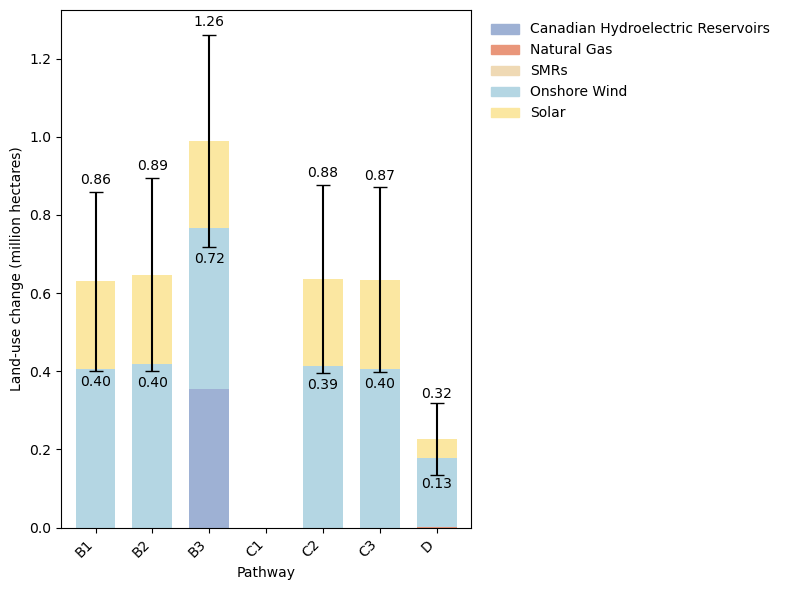

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/Users/amirgazar/Documents/GitHub/Decarbonization-Tradeoffs/1 Decarbonization Pathways/Decarbonization_Pathways.xlsx"

# Read all sheets into a dictionary
all_sheets = pd.read_excel(file_path, sheet_name=None)

# List to hold DataFrames
df_list = []

# Iterate over each sheet
for sheet_name, df in all_sheets.items():
    df['Pathway'] = sheet_name  # Add the 'Pathway' column
    df_list.append(df)

# Concatenate all DataFrames into one
decarb_pathways = pd.concat(df_list, ignore_index=True)

# 0) reproducibility and Monte Carlo settings
np.random.seed(42)
n_sims = 1000

# 1) manual Canadian hydro injection for B3
b3_hydro_map = {2025: 0, 2050: 3692.308}
decarb_pathways['Canadian Hydro'] = 0.0
mask_b3 = decarb_pathways['Pathway'] == 'B3'
decarb_pathways.loc[mask_b3, 'Canadian Hydro'] = (
    decarb_pathways.loc[mask_b3, 'Year']
                  .map(b3_hydro_map)
                  .fillna(0)
)

# 2) distribution parameters (ha per MW)
dist_params = {
    'Canadian Hydro': ('uniform', (43.1, 146.7)),
    'New NG':         ('fixed',   0.032),
    'SMR':            ('fixed',   0.017),
    'Onshore Wind':   ('gamma',   (3.695, 9.382)),
    'Solar':          ('gamma',   (4.25, 0.82)),
}
techs = list(dist_params.keys())

# 3) compute capacity difference from baseline to 2050
baseline = decarb_pathways['Year'].min()
target   = 2050
df0 = decarb_pathways.query("Year == @baseline").set_index('Pathway')
df1 = decarb_pathways.query("Year == @target").set_index('Pathway')
cap_diff = df1[techs] - df0[techs]

# keep C1 on x axis but treat its values as zero
pathways = cap_diff.index.drop('A', errors='ignore')

# prepare array [sim, pathway, tech] in million hectares
samples = np.zeros((n_sims, len(pathways), len(techs)))

for i in range(n_sims):
    samp = pd.DataFrame(index=cap_diff.index, columns=techs, dtype=float)
    for tech, (kind, params) in dist_params.items():
        if kind == 'fixed':
            samp[tech] = params
        elif kind == 'uniform':
            low, high = params
            samp[tech] = np.random.uniform(low, high, size=len(cap_diff))
        elif kind == 'gamma':
            alpha, theta = params
            samp[tech] = np.random.gamma(alpha, theta, size=len(cap_diff))
        else:
            raise ValueError(f"Unknown distribution {kind} for {tech}")

    # compute land-use diff in hectares, then convert to million ha
    land_diff_ha = cap_diff.multiply(samp, axis=0)
    df_plot = land_diff_ha.loc[pathways, techs] / 1_000_000.0
    samples[i, :, :] = df_plot.values

# 4) compute mean and stddev of totals (across techs) in million hectares
sum_samps = samples.sum(axis=2)    # shape (n_sims, n_pathways)
mean_sum  = sum_samps.mean(axis=0) # mean total per pathway
std_sum   = sum_samps.std(axis=0)  # 1σ uncertainty

# force C1 to zero
if 'C1' in pathways:
    idx_c1 = list(pathways).index('C1')
    mean_sum[idx_c1] = 0.0
    std_sum[idx_c1]  = 0.0

# 5) mean per-tech contributions (million hectares)
mean_contrib = samples.mean(axis=0)
mean_df = pd.DataFrame(mean_contrib,
                       index=pathways,
                       columns=techs)
if 'C1' in mean_df.index:
    mean_df.loc['C1'] = 0.0

# 6) plot stacked bar with error bars (excluding C1) and label offset
colors = {
    "Solar":         "#FBE7A1",
    "Onshore Wind":  "#B4D6E3",
    "Canadian Hydro":"#9EB1D4",
    "SMR":           "#EFD9B4",
    "New NG":        "#E9967A"
}
legend_map = {
    "Solar":         "Solar",
    "Onshore Wind":  "Onshore Wind",
    "Canadian Hydro":"Canadian Hydroelectric Reservoirs",
    "SMR":           "SMRs",
    "New NG":        "Natural Gas"
}

ax = mean_df.plot(
    kind='bar',
    stacked=True,
    color=[colors[t] for t in techs],
    figsize=(8, 6),
    width=0.7
)
ax.set_ylabel('Land-use change (million hectares)')
ax.set_xticklabels(pathways, rotation=45, ha='right')

# prepare x positions
x = np.arange(len(pathways))
# mask out C1 for error bars and annotations
mask = np.array(pathways) != 'C1'
x_err = x[mask]
mean_err = mean_sum[mask]
std_err = std_sum[mask]

# overlay error bars only for non-C1
ax.errorbar(x_err, mean_err, yerr=std_err,
            fmt='none', ecolor='black', capsize=5)

# compute small offset (10% of each error bar length)
label_offset = std_err * 0.05

# annotate the top and bottom of each error bar
for xi, mean_val, err, off in zip(x_err, mean_err, std_err, label_offset):
    top = mean_val + err
    bottom = mean_val - err
    ax.text(xi, top + off,    f"{top:.2f}",    ha='center', va='bottom')
    ax.text(xi, bottom - off, f"{bottom:.2f}", ha='center', va='top')

# custom legend
handles = [
    plt.matplotlib.patches.Patch(color=colors[t], label=legend_map[t])
    for t in techs
]
ax.legend(handles=handles,
          loc='upper left',
          bbox_to_anchor=(1.02, 1),
          frameon=False)

plt.tight_layout()
plt.savefig('land_use.png', dpi=300,
            bbox_inches='tight', pad_inches=0.1)
plt.show()


In [4]:
mean_df

,Canadian Hydro,New NG,SMR,Onshore Wind,Solar
Pathway,,,,,
B1,0.000000,0.000000,0.000000,0.405325,0.225197
B2,0.000000,0.000000,0.000000,0.418106,0.229290
B3,0.353487,0.000000,0.000000,0.414124,0.221758
C1,0.000000,0.000000,0.000000,0.000000,0.000000
C2,0.000000,0.000000,0.000071,0.413157,0.222571
C3,0.000000,0.000000,0.000036,0.406475,0.227888
D,0.000000,0.000651,0.000000,0.176573,0.048965
